In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('Data/processed/processed+features.csv')

In [3]:
df.head()

,E_0,E_1,E_10,E_100,E_101,E_102,E_103,E_104,E_105,E_106,...,E_93,E_94,E_95,E_96,E_97,E_98,E_99,age,sex,pathology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,55,0,Anemia
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,Panic attack
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,68,0,Influenza
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,1,Anemia
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,48,1,Boerhaave


In [4]:
df.shape

(130391, 217)

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) 

In [9]:
# Extract features and target variable
y = df["pathology"]  # Target variable
X = df.drop("pathology", axis=1)  # Features



In [11]:
# Oversample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


In [16]:
from collections import Counter

Counter(y_resampled)

Counter({'Anemia': 8457,
         'Panic attack': 8457,
         'Influenza': 8457,
         'Boerhaave': 8457,
         'Bronchospasm / acute asthma exacerbation': 8457,
         'Allergic sinusitis': 8457,
         'Acute otitis media': 8457,
         'Pulmonary embolism': 8457,
         'Viral pharyngitis': 8457,
         'Myasthenia gravis': 8457,
         'Bronchiectasis': 8457,
         'SLE': 8457,
         'Bronchitis': 8457,
         'Pneumonia': 8457,
         'Inguinal hernia': 8457,
         'Acute dystonic reactions': 8457,
         'Acute rhinosinusitis': 8457,
         'Pericarditis': 8457,
         'Atrial fibrillation': 8457,
         'Anaphylaxis': 8457,
         'HIV (initial infection)': 8457,
         'URTI': 8457,
         'Chronic rhinosinusitis': 8457,
         'Cluster headache': 8457,
         'Stable angina': 8457,
         'Spontaneous pneumothorax': 8457,
         'Acute laryngitis': 8457,
         'Pulmonary neoplasm': 8457,
         'Myocarditis': 8457,
 

In [17]:
len(y_resampled)

414393

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [19]:
# Train a random forest classifier

from sklearn.ensemble import RandomForestClassifier



In [20]:
# Train a random forest classifier

clf = RandomForestClassifier(random_state=42)

In [21]:
# Train the classifier

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# judge the classifier

y_pred = clf.predict(X_test)

In [23]:
# Evaluate the classifier

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                          precision    recall  f1-score   support

     Acute COPD exacerbation / infection       1.00      1.00      1.00      2530
                Acute dystonic reactions       1.00      1.00      1.00      2494
                        Acute laryngitis       0.99      1.00      0.99      2511
                      Acute otitis media       0.99      1.00      0.99      2557
                   Acute pulmonary edema       1.00      1.00      1.00      2488
                    Acute rhinosinusitis       0.92      0.90      0.91      2614
                      Allergic sinusitis       1.00      1.00      1.00      2524
                             Anaphylaxis       1.00      1.00      1.00      2551
                                  Anemia       1.00      1.00      1.00      2522
                     Atrial fibrillation       1.00      1.00      1.00      2457
                               Boerhaave       1.00      1.00      1.00      2494
               

In [49]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


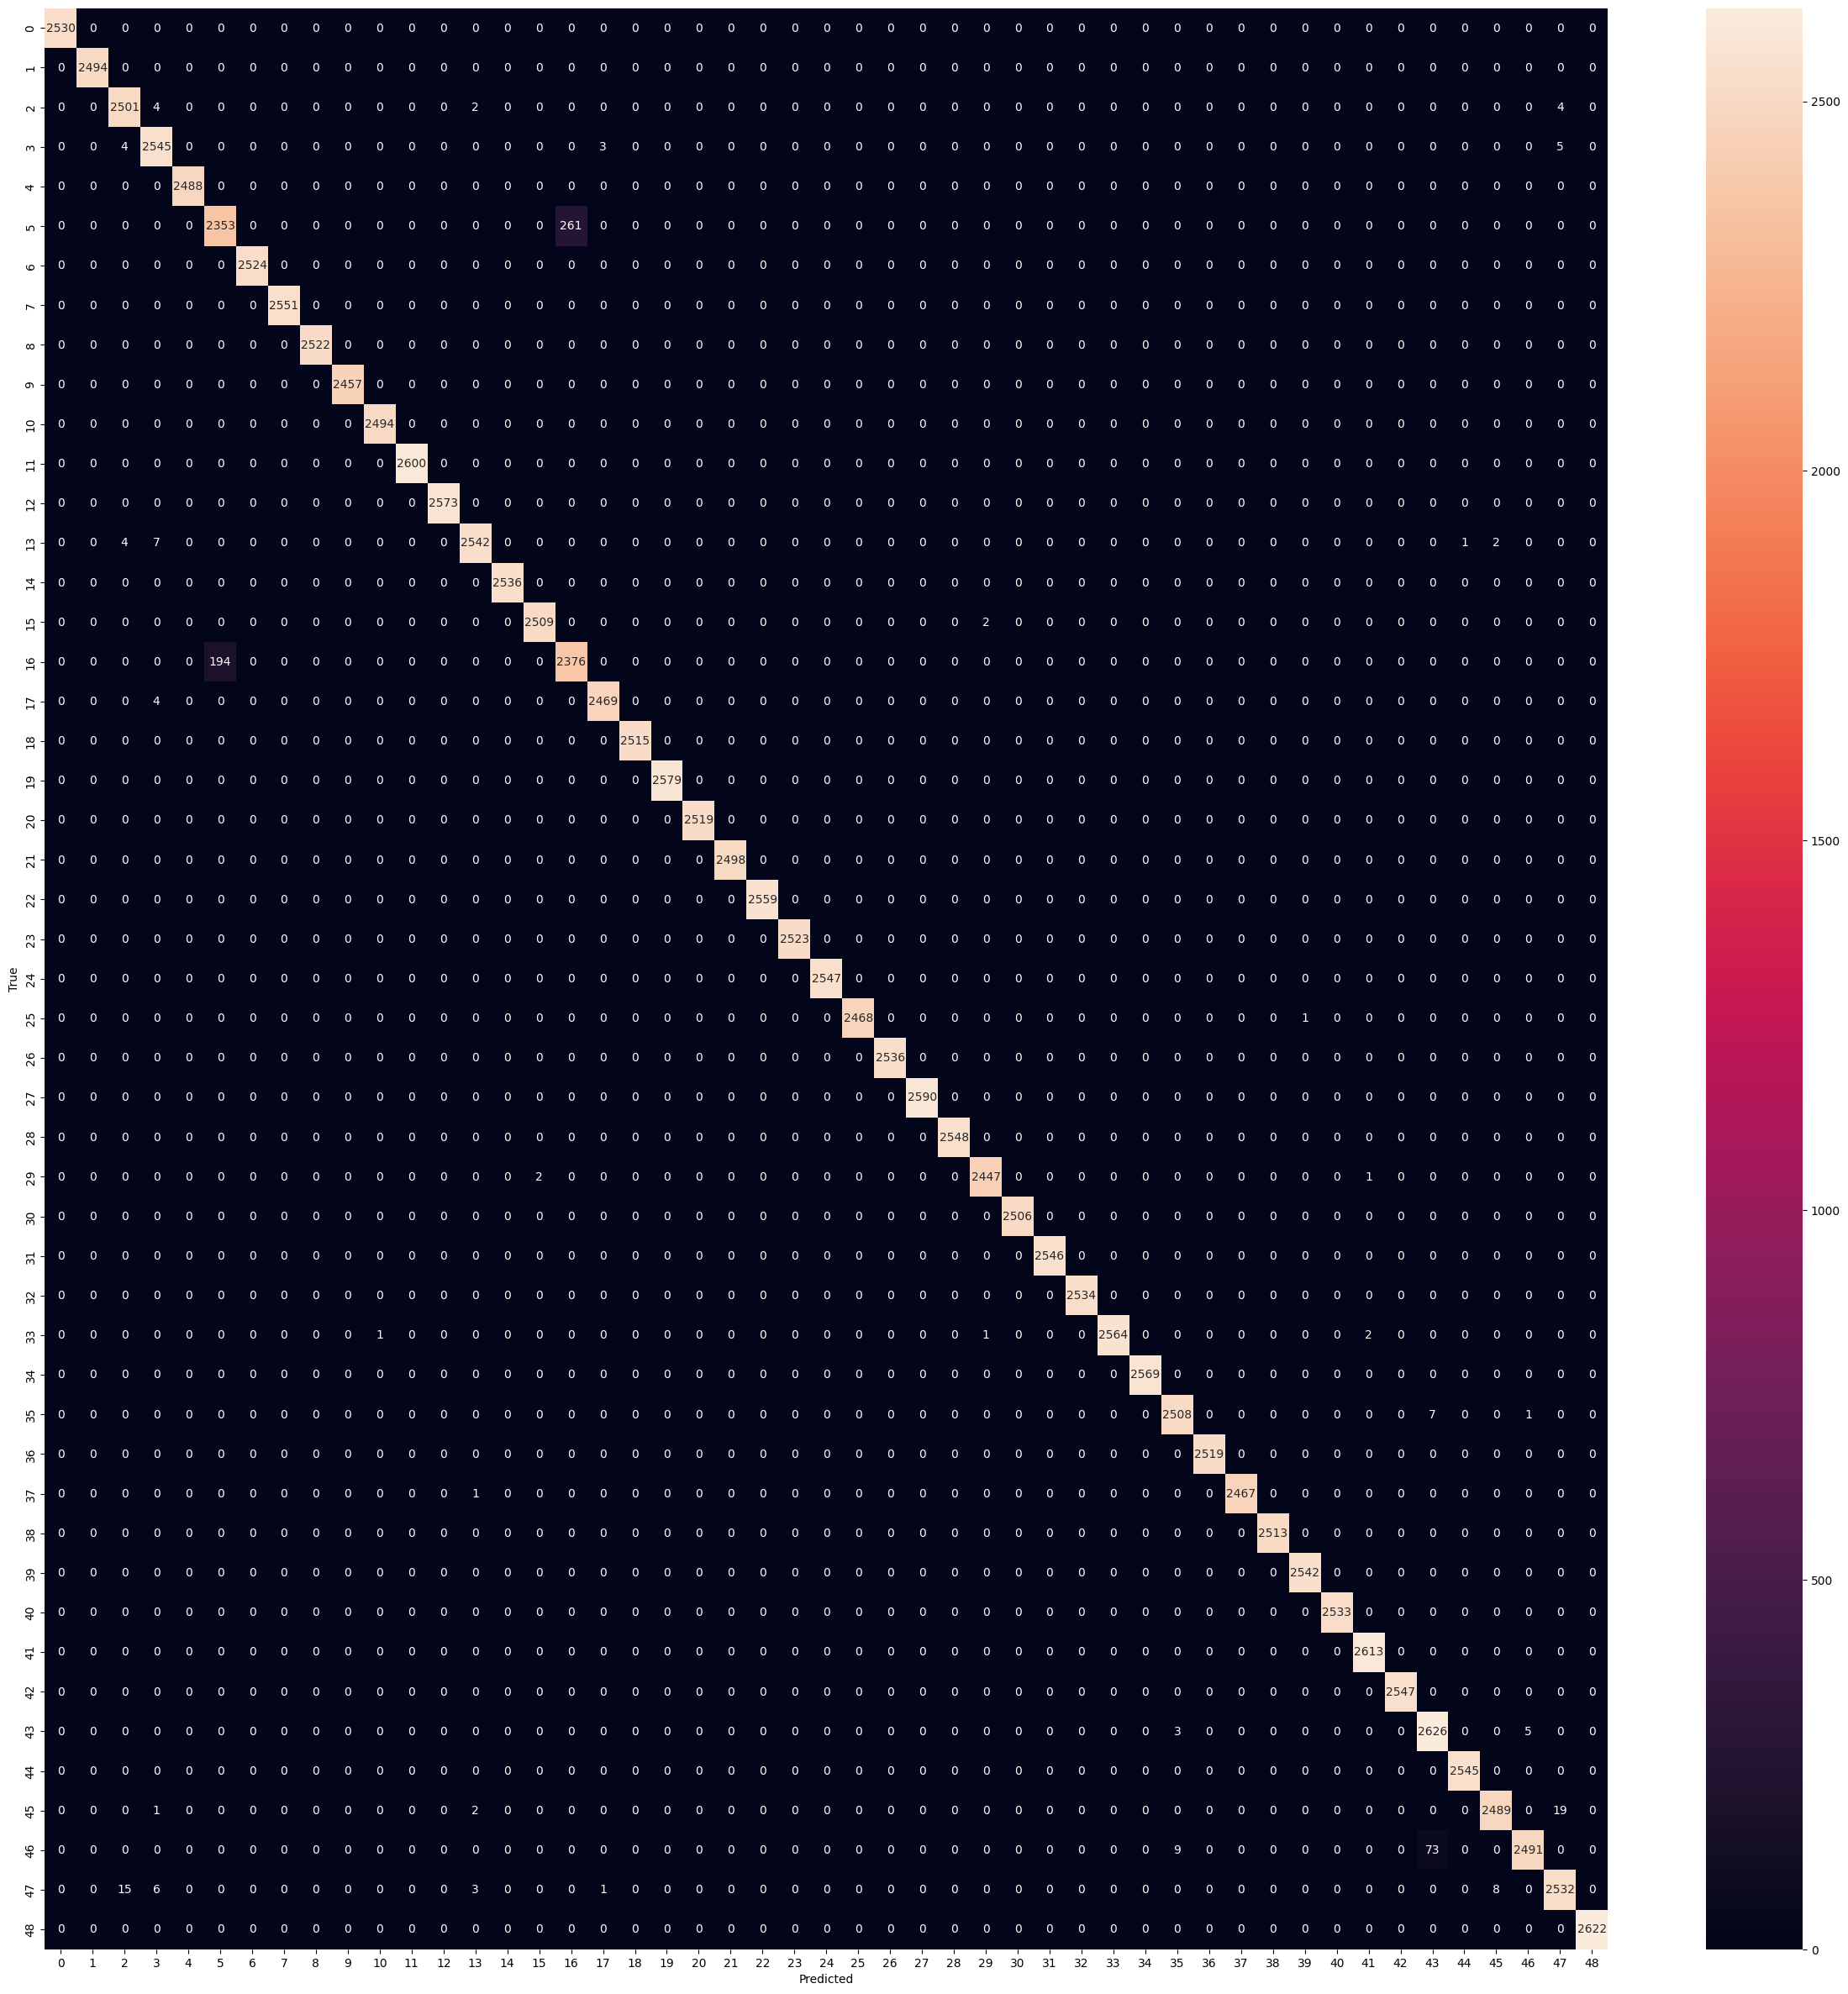

In [50]:
#plot the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

#increse size of the plot
plt.figure(figsize=(30, 30))

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()



In [55]:
import numpy as np

In [57]:
# measure feature importance

feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# A threshold below which to drop features from the final data set. Specifically, this number represents
# the percentage of the most important feature's importance value
fi_threshold = 15

# Get the indexes of all features over the importance threshold
important_idx = np.where(feature_importance > fi_threshold)[0]

important_idx


array([  0,   1,   6,   7,   8,   9,  11,  15,  18,  20,  21,  24,  26,
        27,  28,  32,  33,  34,  35,  36,  37,  41,  46,  48,  50,  54,
        57,  59,  64,  65,  67,  69,  72,  77,  79,  82,  84,  86,  89,
        92,  96,  97, 100, 102, 106, 109, 110, 111, 112, 116, 117, 118,
       120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 136,
       137, 139, 140, 142, 145, 155, 157, 161, 162, 164, 165, 166, 167,
       168, 169, 170, 171, 175, 176, 177, 178, 179, 181, 183, 185, 186,
       190, 191, 192, 201, 203, 205, 206, 211, 214], dtype=int64)

In [59]:
#print the names of the most important features

important_features = X.columns[important_idx]
important_features

Index(['E_0', 'E_1', 'E_103', 'E_104', 'E_105', 'E_106', 'E_108', 'E_111',
       'E_114', 'E_116', 'E_118', 'E_120', 'E_123', 'E_124', 'E_125', 'E_129',
       'E_13', 'E_131', 'E_132', 'E_134', 'E_135', 'E_14', 'E_144', 'E_146',
       'E_148', 'E_151', 'E_155', 'E_157', 'E_161', 'E_162', 'E_164', 'E_166',
       'E_169', 'E_173', 'E_175', 'E_178', 'E_18', 'E_181', 'E_184', 'E_187',
       'E_190', 'E_191', 'E_194', 'E_196', 'E_2', 'E_201', 'E_202', 'E_203',
       'E_204', 'E_208', 'E_209', 'E_21', 'E_211', 'E_212', 'E_214', 'E_215',
       'E_216', 'E_217', 'E_218', 'E_219', 'E_22', 'E_220', 'E_222', 'E_223',
       'E_226', 'E_227', 'E_24', 'E_25', 'E_27', 'E_3', 'E_4', 'E_41', 'E_45',
       'E_46', 'E_48', 'E_49', 'E_5', 'E_50', 'E_51', 'E_52', 'E_53', 'E_57',
       'E_62', 'E_63', 'E_64', 'E_65', 'E_66', 'E_69', 'E_70', 'E_72', 'E_73',
       'E_77', 'E_78', 'E_79', 'E_88', 'E_9', 'E_91', 'E_92', 'E_97', 'age'],
      dtype='object')

In [60]:
len(important_features)

100